In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn.metrics as metrics

from sklearn.dummy import DummyRegressor


from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (mean_squared_error, r2_score, confusion_matrix,
                             ConfusionMatrixDisplay, classification_report)
from sklearn.model_selection import (train_test_split, 
                                     GridSearchCV)
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.tree import (DecisionTreeRegressor, plot_tree,
                          export_text)


from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [2]:
df = pd.read_csv('./data/Final_dataset_Cleaned.csv')

In [3]:
df = df.drop(['Unnamed: 0'], axis =1)

In [4]:
df.head()

,SEASON,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_W_SHOES,WEIGHT,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,STANDING_VERTICAL_LEAP,MAX_VERTICAL_LEAP,LANE_AGILITY_TIME,College WS
0,2000,2124,malik,allen,Malik Allen,PF-C,82.118103,271.0,86.5,109.0,9.297541,9.235294,9.875000,25.500000,29.0,11.83,4.2
1,2000,12019,harold,arceneaux,Harold Arceneaux,SG-SF,78.064583,219.0,80.5,103.0,6.684507,8.636905,9.363095,29.761905,29.0,13.80,5.6
2,2000,12020,lamont,barnes,Lamont Barnes,PF-C,82.118103,235.5,87.5,108.0,9.297541,9.235294,9.875000,28.000000,29.5,12.30,5.2
3,2000,12131,mario,bland,Mario Bland,PF,81.066972,287.0,84.0,103.0,8.297265,8.996644,9.674497,27.000000,31.0,13.04,4.2
4,2000,2049,speedy,claxton,Speedy Claxton,PG,74.130693,166.0,72.0,94.5,6.420144,8.291353,8.971805,36.000000,42.5,10.48,7.0


In [5]:
df.dtypes

SEASON                      int64
PLAYER_ID                   int64
FIRST_NAME                 object
LAST_NAME                  object
PLAYER_NAME                object
POSITION                   object
HEIGHT_W_SHOES            float64
WEIGHT                    float64
WINGSPAN                  float64
STANDING_REACH            float64
BODY_FAT_PCT              float64
HAND_LENGTH               float64
HAND_WIDTH                float64
STANDING_VERTICAL_LEAP    float64
MAX_VERTICAL_LEAP         float64
LANE_AGILITY_TIME         float64
College WS                float64
dtype: object

In [6]:
df.size

21726

In [7]:
df.shape

(1278, 17)

In [8]:
# Look at dataset to gain better understanding of values

df.describe()

,SEASON,PLAYER_ID,HEIGHT_W_SHOES,WEIGHT,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,STANDING_VERTICAL_LEAP,MAX_VERTICAL_LEAP,LANE_AGILITY_TIME,College WS
count,1278.000000,1.278000e+03,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000
mean,2010.325509,2.116806e+06,78.748612,215.288654,82.272574,103.281690,7.509613,8.720847,9.423257,29.309722,34.568884,11.410234,4.519484
std,6.582444,5.489703e+07,3.213590,26.053283,3.999241,4.883247,2.677729,0.395391,0.555984,2.927219,3.515654,0.561972,2.003299
min,2000.000000,-1.000000e+00,69.000000,149.200000,70.000000,88.500000,2.600000,7.500000,7.000000,20.500000,21.000000,9.650000,-0.300000
25%,2005.000000,1.218525e+04,76.500000,196.000000,79.500000,100.000000,5.612500,8.500000,9.000000,27.500000,32.000000,11.030000,3.400000
50%,2010.000000,2.023245e+05,79.000000,213.700000,82.500000,103.500000,6.800000,8.750000,9.439904,29.000000,34.500000,11.350000,4.600000
75%,2016.000000,1.627775e+06,81.066972,233.950000,85.000000,107.000000,8.627381,9.000000,9.750000,31.000000,36.500000,11.740000,5.700000
max,2022.000000,1.962937e+09,91.000000,334.000000,98.250000,122.500000,23.100000,10.500000,11.750000,41.500000,48.000000,13.800000,15.200000


In [9]:
# Shows the Average College Win/Shares for all of dataset

print('Average: {:.2f} College Win/Shares'.format(np.mean(df['College WS'])))

Average: 4.52 College Win/Shares


# Model testing 1:

In [10]:
# My target variable is College WS
# The rest of my columns minus: season & player id are the features I am including

y = df['College WS']
X = df[['HEIGHT_W_SHOES', 'WEIGHT', 'WINGSPAN', 'STANDING_REACH', 'BODY_FAT_PCT',
       'HAND_LENGTH', 'HAND_WIDTH', 'STANDING_VERTICAL_LEAP',
       'MAX_VERTICAL_LEAP', 'LANE_AGILITY_TIME']]

In [11]:
def get_linear_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)
    lr = LinearRegression()
    lr_fit_train_test = lr.fit(X_train, y_train)
    
    #Baseline Score
    dummy_reg = DummyRegressor(strategy='mean')
    # fit it on the training set
    dummy_reg.fit(X_train, y_train)
    # make predictions on the test set
    y_pred = dummy_reg.predict(X_test)

    # calculate root mean squared error
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("Dummy Baseline RMSE:", rmse)
    
    #Fit
    lr_fit = lr.fit(X, y)
    lr_score = lr.score(X, y)
    cross_val_xy = cross_val_score(lr, X, y)
    rmse_lr = mean_squared_error(y_true=y, y_pred=lr.predict(X), squared=False)
    
    #Train-Test Split
    cross_val = cross_val_score(lr, X_train, y_train)
    r2_train = lr.score(X_train, y_train)
    r2_test = lr.score(X_test, y_test)
    
    rmse_train = mean_squared_error(y_true=y_train, y_pred=lr.predict(X_train), squared=False)
    rmse_test = mean_squared_error(y_true=y_test, y_pred=lr.predict(X_test), squared=False)
    
    # Prediction and Residuals
    lr_preds = lr.predict(X_test)
    lr_residuals = lr_preds - y_test
   
    # Residuals Plot
    plt.scatter(lr_residuals.index, lr_residuals)
    plt.title("Residuals", fontsize = 15)
    plt.ylabel("Actual Values", fontsize = 15)
    plt.xlabel("Predicted Values", fontsize = 15)
    
    print(f'Linear Regression R^2: {lr_score}')
    print(f'Linear Regression Cross Validation: {cross_val_xy}')
    print('')
    print(f'Linear Regression Train Cross Validation: {cross_val}')
    print(f'Linear Regression Train R^2: {r2_train}')
    print(f'Linear Regression Test R^2: {r2_test}')
    print(f'Root Mean Squared Error Train: {rmse_train}')
    print(f'Root Mean Squared Error Test: {rmse_test}')

Dummy Baseline RMSE: 1.9740470608558527
Linear Regression R^2: 0.026389526054644286
Linear Regression Cross Validation: [-0.0583718  -0.04918891 -0.06725042 -0.05243688 -0.03346143]

Linear Regression Train Cross Validation: [-0.4370809  -0.01429509  0.01120612 -0.22830468  0.01345392]
Linear Regression Train R^2: 0.013370097089625776
Linear Regression Test R^2: 0.030062328591357157
Root Mean Squared Error Train: 2.099431733840268
Root Mean Squared Error Test: 1.9439055916645125


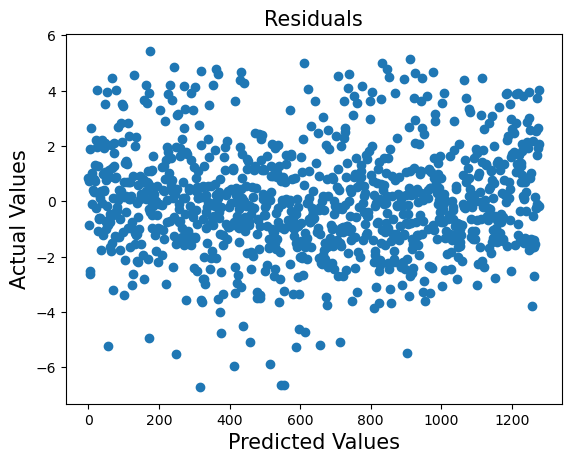

In [12]:
get_linear_regression(X,y)

Looking at my first model of linear regresssion I see that my test RMSE is lower than the baseline model and 
is lower than the training RMSE.  These are both good things.  Looking at my residual plot, the difference 
between observed and predicted responses, we can see that the points are very dispersed.  

Result:
    
Training RMSE: 2.099

Testing RMSE: 1.943

In [13]:
def get_ridge_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
    ss = StandardScaler()
    ss.fit(X_train)
    
    X_train_ss = ss.transform(X_train)
    X_test_ss = ss.transform(X_test)
    
    ridge = RidgeCV(alphas=np.linspace(0.1, 10, 100))
    ridge.fit(X_train_ss, y_train)                
                    
    coefficients = ridge.coef_
    ridge_train_score = ridge.score(X_train_ss, y_train)      
    ridge_test_score = ridge.score(X_test_ss, y_test)
    
    ridge_preds = ridge.predict(X_test_ss)
    ridge_resid = ridge_preds- y_test
    
    plt.scatter(ridge_resid.index, ridge_resid)
    plt.ylabel("Residual")
    plt.xlabel("Predicted Values");
    
    rmse_train_ridge = mean_squared_error(y_true=y_train, y_pred=ridge.predict(X_train_ss), squared=False)
    rmse_test_ridge = mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test_ss), squared=False)                
    
    print('The Ridge Coefficients are: ', coefficients)
    print('The train R^2 score is: ', ridge_train_score)
    print('The test R^2 score is: ', ridge_test_score)
    print('The train RMSE score is ', rmse_train_ridge)   
    print('The test RMSE score is ', rmse_test_ridge)

The Ridge Coefficients are:  [-0.03972829  0.43685472 -0.18597324 -0.04465815 -0.23808559 -0.04026391
  0.0172569   0.12699661 -0.26248176 -0.20449758]
The train R^2 score is:  0.02806021081400889
The test R^2 score is:  0.011910910620772097
The train RMSE score is  1.9694526887580583
The test RMSE score is  2.008652196409351


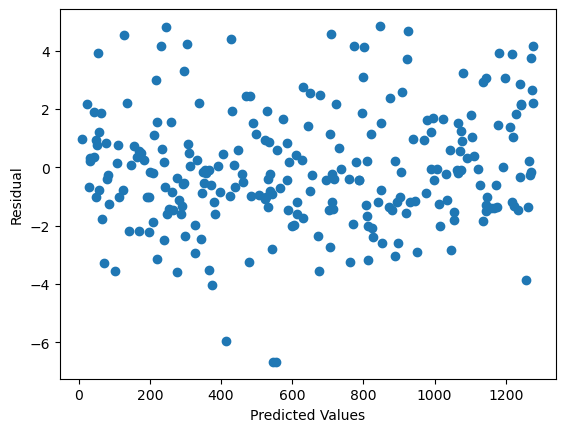

In [14]:
get_ridge_regression(X, y)

Next I did a Ridge Regression model, a method of estimating the coeffiecients  by reducing the standard error.  Here the
loss function is modified to reduce complexity in the model.  However based on results the test RMSE is now greater
than the testing RMSE (overfit).  

Result:
    
Training RMSE: 1.969
    
Testing RMSE: 2.008

In [15]:
def get_lasso_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
    ss = StandardScaler()
    ss.fit(X_train)
    
    X_train_ss = ss.transform(X_train)
    X_test_ss = ss.transform(X_test)
    
    lasso = LassoCV(n_alphas= 200)
    lasso.fit(X_train_ss, y_train)
    
    alpha = lasso.alpha_
                    
    r2_train_lasso = lasso.score(X_train_ss, y_train)
    r2_test_lasso = lasso.score(X_test_ss, y_test)
    
    
    lasso_preds = lasso.predict(X_test_ss)
    lasso_resid = lasso_preds- y_test
    
    plt.scatter(lasso_resid.index, lasso_resid)
    plt.ylabel("Residual")
    plt.xlabel("Predicted Values");
    
    rmse_train_lasso = mean_squared_error(y_true=y_train, y_pred=lasso.predict(X_train_ss), squared=False)
    rmse_test_lasso = mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test_ss), squared=False)                
    
    print('The Alpha for Lasso is: ', alpha)
    print('The train R^2 score is: ', r2_train_lasso)
    print('The test R^2 score is: ', r2_test_lasso)
    print('The train RMSE score is ', rmse_train_lasso)   
    print('The test RMSE score is ', rmse_test_lasso)

The Alpha for Lasso is:  0.023079778939717983
The train R^2 score is:  0.0241100756398136
The test R^2 score is:  0.014719473194056198
The train RMSE score is  1.9734507326832655
The test RMSE score is  2.005795450002293


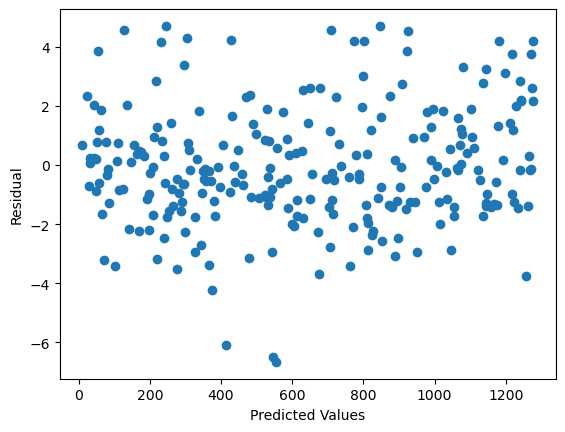

In [16]:
get_lasso_regression(X, y)


Next I used Lasso regression to see if it would improve my RMSE.  In Lasso regression, it eliminates
variables and features that are not correlated. This can help with better feature selection and accuracy.  However,
based on results, it had a worse RMSE than the linear regression. Training RMSE > Testing RMSE and the RMSE is greater.

Result:
    
Training RMSE: 1.973

Testing RMSE: 2.005

# Model testing 2

#### Changing the X variables to have different variables.  I decided to remove weight, body fat, and lane agility to see how
#### the model adjusts

In [17]:
mlr = LinearRegression()

y = df['College WS']
X = df[['HEIGHT_W_SHOES', 'WINGSPAN', 'STANDING_REACH',
       'HAND_LENGTH', 'HAND_WIDTH', 'STANDING_VERTICAL_LEAP',
       'MAX_VERTICAL_LEAP']]

# Removed: weight, body fat pct., lane agility
# Altering feature selection to see if it affects model

model = mlr.fit(X, y)

y_pred = model.predict(X)

Dummy Baseline RMSE: 1.9740470608558527
Linear Regression R^2: 0.006630186198650745
Linear Regression Cross Validation: [-0.09608177 -0.07018401 -0.09779806 -0.03667126 -0.05801322]

Linear Regression Train Cross Validation: [-0.37725725 -0.0174535  -0.03848663 -0.02920609 -0.01500336]
Linear Regression Train R^2: 0.007582900128424552
Linear Regression Test R^2: 0.006308350988321387
Root Mean Squared Error Train: 2.105579966530989
Root Mean Squared Error Test: 1.9675649406695754


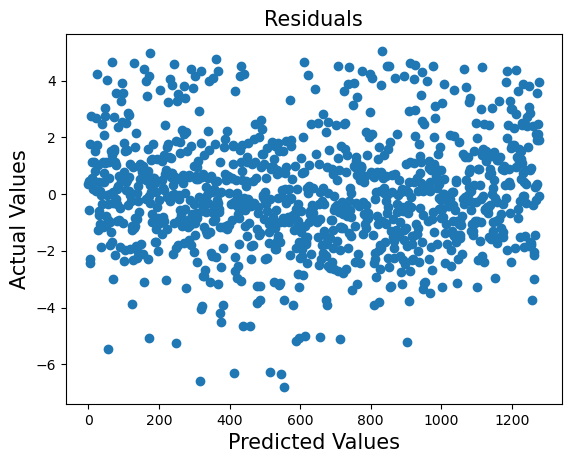

In [18]:
get_linear_regression(X,y)

Here I changed the features used in model as I thought the column's weight, body fat, and lane agility time would not
be key indicators for the target variable.  Based on my results my testing RMSE was less than training RMSE, which is good.
However the RMSE are both greater than the previous linear regression model.

Results:

Training RMSE: 2.105

Testing RMSE: 1.967

The Ridge Coefficients are:  [ 0.06630213 -0.14891782 -0.05609249  0.01882583  0.05086411  0.17789478
 -0.21526998]
The train R^2 score is:  0.005640788491379167
The test R^2 score is:  0.005156810512362164
The train RMSE score is  1.9920375574685667
The test RMSE score is  2.0155055931907166


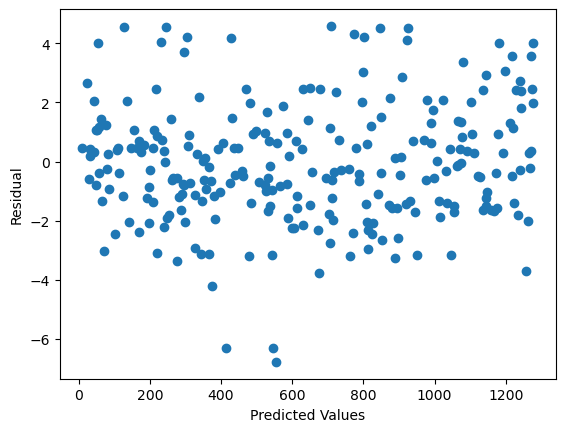

In [19]:
get_ridge_regression(X, y)

Using Ridge Regression on the new feature, I can see that the RMSE has increased compared to the previous ridege model.

Results:

Training RMSE: 1.992

Testing RMSE: 2.0155

The Alpha for Lasso is:  0.06749807550091988
The train R^2 score is:  0.0
The test R^2 score is:  -0.001213745290682633
The train RMSE score is  1.9976797698801536
The test RMSE score is  2.0219485186837156


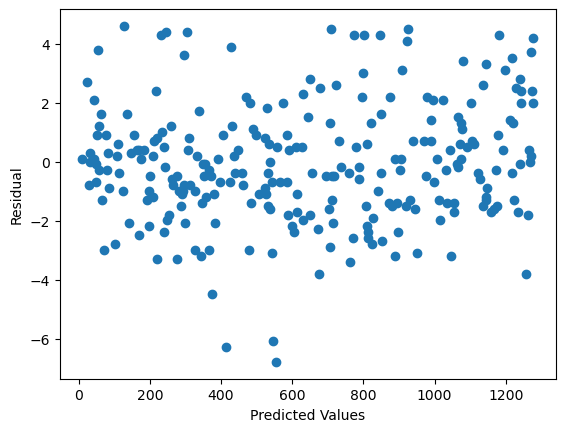

In [20]:
get_lasso_regression(X, y)

Again, I used the lasso regression model on the altered featues and saw the results were worse compared to the prevoius 
Lasso model.

Results:
    
Training RMSE: 1.997
    
Testing RMSE: 2.021

# Model 3: Decisoin Tree

Based off the previous models I ran above I decided to use all the columns minus player id and season as the features 
I will use for this model.

In [21]:
y = df['College WS']
X = df[['HEIGHT_W_SHOES', 'WEIGHT', 'WINGSPAN', 'STANDING_REACH', 'BODY_FAT_PCT',
       'HAND_LENGTH', 'HAND_WIDTH', 'STANDING_VERTICAL_LEAP',
       'MAX_VERTICAL_LEAP', 'LANE_AGILITY_TIME']]

In [22]:
# X before y, train before test
X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((958, 10), (320, 10), (958,), (320,))

In [24]:
# Make a baseline model and calculate the MSE for the train data

# Regressor that makes predictions using simple rules.
baseline_model = DummyRegressor(strategy='mean')
baseline_model.fit(X_train, y_train)

DummyRegressor()

In [25]:
y_preds_null = baseline_model.predict(X_train)

In [26]:
mean_squared_error(y_train, y_preds_null)

3.9423894160154465

In [27]:
# Instantiate
tree = DecisionTreeRegressor(random_state=1, max_depth=3)

# Fit our estimator on X_train and y_train
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [28]:
# Evaluate using .score
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.07848974583535628, -0.043702279354608464)

In [29]:
# Predict on X_test
y_preds = tree.predict(X_test)

In [30]:
# Predict on X_train to compare RMSE
x_preds = tree.predict(X_train)

In [31]:
# RMSE for training
print(f'RMSE is {mean_squared_error(y_train, x_preds, squared=False)}')

RMSE is 1.9060305015314931


In [32]:

print(f'MSE is {mean_squared_error(y_test, y_preds)}')
print(f'RMSE is {mean_squared_error(y_test, y_preds, squared=False)}')

MSE is 4.396020082818781
RMSE is 2.0966688061825076


Using the Decision Tree Model, this model breaks down the dataset into smaller subsets based off True and False questions.
The result is a tree with multiple nodes allowing to visulaize the path of the model.  Looking at the result of this model
it got an RMSE of 2.096 which is greater than testing RMSE in the first linear regression model.

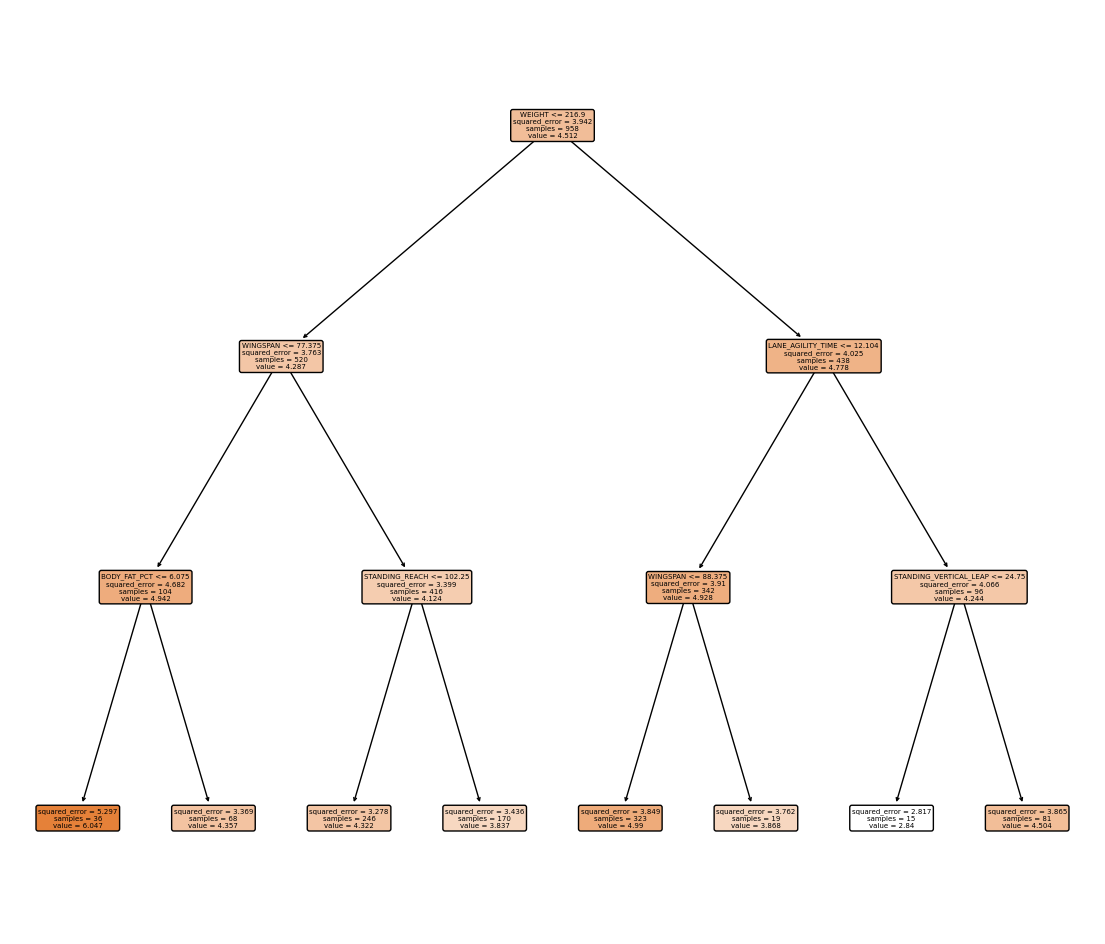

In [33]:
plt.figure(figsize=(14,12))
plot_tree(tree, feature_names = X_train.columns, 
         rounded=True, filled=True);

The decision tree above allows me to map out how the decisoin tree was created what question was asked each node.  This 
tree is a grea visual on seeing how the model worked.

In [34]:
# This allows me to look at what features were the most important in this model.  I can see that winspan and body fat are 
# imporant

pd.DataFrame(
    tree.feature_importances_,
    index=X_train.columns,
    columns=['feature importances'])

,feature importances
HEIGHT_W_SHOES,0.000000
WEIGHT,0.192838
WINGSPAN,0.264192
STANDING_REACH,0.079734
BODY_FAT_PCT,0.226750
HAND_LENGTH,0.000000
HAND_WIDTH,0.000000
STANDING_VERTICAL_LEAP,0.118173
MAX_VERTICAL_LEAP,0.000000
LANE_AGILITY_TIME,0.118313


## Tuning Decision Tree

In [35]:
# Next I used Gridsearch to find the best parameter in decision tree
# I made the gridsearch go through 13 different caondidates.
# The depth of a tree is the max distance between root and leaf

params = {
    'max_depth': range(2,15) # 13 candidates
}

gs = GridSearchCV(DecisionTreeRegressor(), param_grid=params, cv=100, verbose=1)

gs.fit(X_train, y_train)

Fitting 100 folds for each of 13 candidates, totalling 1300 fits


GridSearchCV(cv=100, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(2, 15)}, verbose=1)

In [36]:
# Check out the best parameters
gs.best_params_

{'max_depth': 2}

In [37]:
# After gridsearch I looked at the important features again and saw that weight, agility time and wingspan
# are still impotant

# In DataFrame format
pd.DataFrame(
    gs.best_estimator_.feature_importances_,
    index=X_train.columns,
    columns=['feature importances'])

,feature importances
HEIGHT_W_SHOES,0.000000
WEIGHT,0.386307
WINGSPAN,0.376680
STANDING_REACH,0.000000
BODY_FAT_PCT,0.000000
HAND_LENGTH,0.000000
HAND_WIDTH,0.000000
STANDING_VERTICAL_LEAP,0.000000
MAX_VERTICAL_LEAP,0.000000
LANE_AGILITY_TIME,0.237013


In [38]:
x_preds = gs.predict(X_train)

In [39]:
# Training RMSE
print(f'RMSE is {mean_squared_error(y_train, x_preds, squared=False)}')

RMSE is 1.9462588185094238


In [40]:
y_preds = gs.predict(X_test)

In [41]:
print(f'MSE is {mean_squared_error(y_test, y_preds)}')
print(f'RMSE is {mean_squared_error(y_test, y_preds, squared=False)}')

MSE is 4.21941343178778
RMSE is 2.054121084986905


Text(0.5, 0, 'Predicted Values')

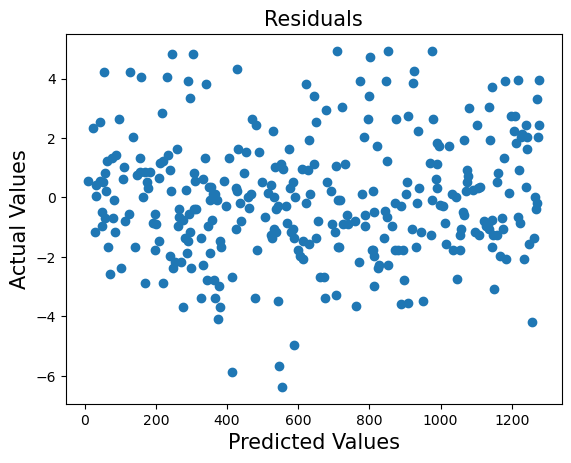

In [42]:
    # Prediction and Residuals
    lr_preds = gs.predict(X_test)
    lr_residuals = lr_preds - y_test
   
    # Residuals Plot
    plt.scatter(lr_residuals.index, lr_residuals)
    plt.title("Residuals", fontsize = 15)
    plt.ylabel("Actual Values", fontsize = 15)
    plt.xlabel("Predicted Values", fontsize = 15)

Looking at the Results after we tuned our regression tree I can see that the RMSE lowered but compared to the orginal
linear regression results it is still worse.  However this model gave me great insight on the what feature's were
the most important in the model.

Results:

Testing RMSE: 2.054

# Model 4: Random Forests

In [43]:
# Same target and features used in previous model

y = df['College WS']
X = df[['HEIGHT_W_SHOES', 'WEIGHT', 'WINGSPAN', 'STANDING_REACH', 'BODY_FAT_PCT',
       'HAND_LENGTH', 'HAND_WIDTH', 'STANDING_VERTICAL_LEAP',
       'MAX_VERTICAL_LEAP', 'LANE_AGILITY_TIME']]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Split data up

In [45]:
# intitate
rfc = RandomForestRegressor()

In [46]:
etc = ExtraTreesRegressor()
# intiate

In [47]:
cross_val_score(rfc, X_train, y_train, cv=5).mean()
# determine which tree regessor I want to use.

-0.04921744126198604

In [48]:
cross_val_score(etc, X_train, y_train, cv=5).mean()

-0.05580560853561993

In [49]:
# Used Gridsearch to find out the best parameters for this Random Forest model.
# n_estimators specifies the number of tree's for the model.  
# I will use the extratreeregessor based off the cross val score

etc_params = {
    'n_estimators': [50, 200, 500],
    'max_depth': [None, 2, 3, 5],
}
gs = GridSearchCV(etc, param_grid=etc_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.010407602681914119


{'max_depth': 5, 'n_estimators': 500}

In [50]:
# etc_params = {
#     'n_estimators': [28, 29, 30],
#     'max_depth': [4, 5, 6, 7],
# }
# gs = GridSearchCV(etc, param_grid=etc_params, cv=5)
# gs.fit(X_train, y_train)
# print(gs.best_score_)
# gs.best_params_

In [51]:
etc_params = {
    'n_estimators': [22, 25, 28],
    'max_depth': [4, 5, 6, 7],
}
gs = GridSearchCV(etc, param_grid=etc_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.010883107470389675


{'max_depth': 5, 'n_estimators': 25}

In [52]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.10931026570110847, 0.0228533941543817)

In [53]:
df.head()

,SEASON,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_W_SHOES,WEIGHT,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,STANDING_VERTICAL_LEAP,MAX_VERTICAL_LEAP,LANE_AGILITY_TIME,College WS
0,2000,2124,malik,allen,Malik Allen,PF-C,82.118103,271.0,86.5,109.0,9.297541,9.235294,9.875000,25.500000,29.0,11.83,4.2
1,2000,12019,harold,arceneaux,Harold Arceneaux,SG-SF,78.064583,219.0,80.5,103.0,6.684507,8.636905,9.363095,29.761905,29.0,13.80,5.6
2,2000,12020,lamont,barnes,Lamont Barnes,PF-C,82.118103,235.5,87.5,108.0,9.297541,9.235294,9.875000,28.000000,29.5,12.30,5.2
3,2000,12131,mario,bland,Mario Bland,PF,81.066972,287.0,84.0,103.0,8.297265,8.996644,9.674497,27.000000,31.0,13.04,4.2
4,2000,2049,speedy,claxton,Speedy Claxton,PG,74.130693,166.0,72.0,94.5,6.420144,8.291353,8.971805,36.000000,42.5,10.48,7.0


In [54]:
x_preds = gs.predict(X_train)

In [55]:
# RMSE for training
print(f'RMSE is {mean_squared_error(y_train, x_preds, squared=False)}')

RMSE is 1.885337452977383


In [56]:
y_preds = gs.predict(X_test)

In [57]:
print(f'MSE is {mean_squared_error(y_test, y_preds)}')
print(f'RMSE is {mean_squared_error(y_test, y_preds, squared=False)}')

MSE is 3.990001987536887
RMSE is 1.99749893305025


Text(0.5, 0, 'Predicted Values')

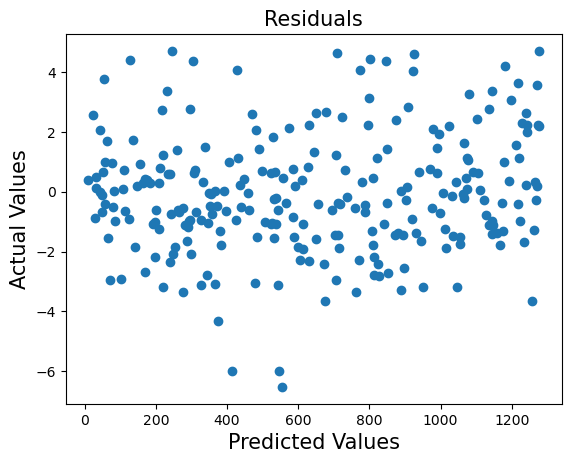

In [58]:
   # Prediction and Residuals
lr_preds = gs.predict(X_test)
lr_residuals = lr_preds - y_test
   
    # Residuals Plot
plt.scatter(lr_residuals.index, lr_residuals)
plt.title("Residuals", fontsize = 15)
plt.ylabel("Actual Values", fontsize = 15)
plt.xlabel("Predicted Values", fontsize = 15)

The results from here had the lowest test RMSE.  This means this model reduced the error between predicted and observed
responses the most.

Result:
    
Testing RMSE: 1.998

# Test Model with deliverable data

I created a dataframe with 10 fake players.  For each position I incorporated the average NBA combine stats
per position via DraftExpress.com  The odd players in the data frame: Player1 1, Player3 3, Player5 5, Player7 7, and
Player9 9 are all the avg. stats.  The other players (even numbered ones) are fake players with high altered 
nba combine stats in a few areas.  Below I will show my adjustments:

Player2 2:(position: PG) Dec. weight., Inc. lane agility, inc. Vertical (A light, quick point guard, that is quick)
    
Player4 4:(position: SG) Dec. height, weight, & agility., Inc. lane Hand size (A smaller slower but large hand guard)
    
Player6 6:(position: SF) Dec. wt., Inc. height, weight, & hand size (Tall, heavy, big hand small forward)
    
Player8 8:(position: PF) Inc. Wingspan & height, Dec. Weight (A tall lanky player)

Playe10 10:(position: C) Inc. handsize, weight, body fat, Dec. height (A shorter bigger center)


Below are highly altered players

Player10 10:(position: PG) Dec. weight., Inc. lane agility, inc. Vertical (A light, quick point guard, that is quick)

Playe11 11:(position: C) Inc. handsize, weight, body fat, Dec. height (A shorter bigger center)

Player12 12:(position: SG) Inc. Weight and Wingspan

I created these fake players to see what Win share would be produced per each player to see the discrpenacy and see
what player builds have a higher potential to positively impact a team using Win Share as the metric.  To view the exact changes, they can be found in the dataset: Test Data.xlsx

In [59]:
# Load in new data with created players

test_data = 'Test Data.xlsx'

test_df = pd.read_excel('./data/Test Data.xlsx')


In [60]:
test_df.head(16)

,SEASON,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_W_SHOES,WEIGHT,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,STANDING_VERTICAL_LEAP,MAX_VERTICAL_LEAP,LANE_AGILITY_TIME,College WS
0,2023,100000,Player1,1,Player1 1,PG,75,189,78,98.0,6.0,8.5,9.4,30.8,36.9,11.1,NaN
1,2023,200000,Player2,2,Player2 2,PG,77,160,80,100.0,5.4,8.0,8.9,33.0,41.0,10.0,NaN
2,2023,100000,Player3,3,Player3 3,SG,77,204,80,101.0,6.6,8.9,9.4,31.5,37.2,11.1,NaN
3,2023,300000,Player4,4,Player4 4,SG,74,190,81,98.0,6.5,9.4,10.0,32.0,37.0,11.9,NaN
4,2023,400000,Player5,5,Player5 5,SF,79,218,83,105.0,6.1,8.8,9.2,30.1,35.8,11.4,NaN
5,2023,500000,Player6,6,Player6 6,SF,81,230,83,107.0,6.1,9.5,10.0,30.0,35.5,11.4,NaN
6,2023,600000,Player7,7,Player7 7,PF,81,234,85,107.0,7.8,9.1,9.7,29.9,34.9,11.4,NaN
7,2023,700000,Player8,8,Player8 8,PF,83,210,90,110.0,7.8,9.1,9.7,30.0,35.0,11.2,NaN
8,2023,800000,Player9,9,Player9 9,C,83,247,89,109.5,7.8,9.4,9.9,28.7,32.8,11.7,NaN
9,2023,900000,Player10,10,Player10 10,C,81,250,89,109.5,8.0,9.6,10.1,27.0,31.0,12.0,NaN


In [61]:
# Drop the College WS column as a new will be created 
test_df = test_df.drop('College WS', axis=1)

In [62]:
# This model produced the lowest RMSE score seen earlier in the notebook ( Model 1 Linear Regression )
# Using the Same features as well

def get_linear_regression_final(X, y, test_df):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)
    lr = LinearRegression()
    lr_fit_train_test = lr.fit(X_train, y_train)
    
    
    lr_fit = lr.fit(X, y)
    test_df = test_df[['HEIGHT_W_SHOES', 'WEIGHT', 'WINGSPAN', 'STANDING_REACH', 'BODY_FAT_PCT',
       'HAND_LENGTH', 'HAND_WIDTH', 'STANDING_VERTICAL_LEAP',
       'MAX_VERTICAL_LEAP', 'LANE_AGILITY_TIME']]
    
    var = pd.DataFrame(lr.predict(test_df))
    return(pd.concat([test_df, var], axis=1))

In [63]:
Deliverable = get_linear_regression_final(X, y, test_df)

In [64]:
Deliverable.head()

,HEIGHT_W_SHOES,WEIGHT,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,STANDING_VERTICAL_LEAP,MAX_VERTICAL_LEAP,LANE_AGILITY_TIME,0
0,75,189,78,98.0,6.0,8.5,9.4,30.8,36.9,11.1,4.532662
1,77,160,80,100.0,5.4,8.0,8.9,33.0,41.0,10.0,4.229131
2,77,204,80,101.0,6.6,8.9,9.4,31.5,37.2,11.1,4.577730
3,74,190,81,98.0,6.5,9.4,10.0,32.0,37.0,11.9,4.087634
4,79,218,83,105.0,6.1,8.8,9.2,30.1,35.8,11.4,4.559291


In [65]:
# add back positions per player to see the changes per postition

positions = ['PG', 'PG', 'SG', 'SG', 'SF', 'SF', 'PF', 'PF', 'C', 'C', 'PG', 'C', 'SG']

In [66]:
# Add Position column to dataframe

Deliverable['POSITIONS'] = positions

In [67]:
# change name of column from 0 to Predicted Win Share

Deliverable.rename(columns={0: 'Predicted Win Share'}, inplace=True)

In [68]:
Deliverable.head(15)

,HEIGHT_W_SHOES,WEIGHT,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,STANDING_VERTICAL_LEAP,MAX_VERTICAL_LEAP,LANE_AGILITY_TIME,Predicted Win Share,POSITIONS
0,75,189,78,98.0,6.0,8.5,9.4,30.8,36.9,11.1,4.532662,PG
1,77,160,80,100.0,5.4,8.0,8.9,33.0,41.0,10.0,4.229131,PG
2,77,204,80,101.0,6.6,8.9,9.4,31.5,37.2,11.1,4.577730,SG
3,74,190,81,98.0,6.5,9.4,10.0,32.0,37.0,11.9,4.087634,SG
4,79,218,83,105.0,6.1,8.8,9.2,30.1,35.8,11.4,4.559291,SF
5,81,230,83,107.0,6.1,9.5,10.0,30.0,35.5,11.4,4.676197,SF
6,81,234,85,107.0,7.8,9.1,9.7,29.9,34.9,11.4,4.577238,PF
7,83,210,90,110.0,7.8,9.1,9.7,30.0,35.0,11.2,4.010440,PF
8,83,247,89,109.5,7.8,9.4,9.9,28.7,32.8,11.7,4.535112,C
9,81,250,89,109.5,8.0,9.6,10.1,27.0,31.0,12.0,4.539271,C


The above dataframe shows the predicted Win Share per created player based off their altered Combine stats.  This shows how 
valuable each column is and how it can alter their Win Share.  

## Exceutive Summary

This project showed the importance of each event at the NBA Combine and how it can affect a player's win share.  Out of all 
the models I ran (linear regression, ridge regression, lasso regression, decision tree, and random forest) linear regression
produced the lowest RMSE.  After creating fake players and running it through the optimal model I can predict the potential 
value of a player using Win Share as the metric.  These Results showed:

    a.) Features such as Wingspan, Weight are some of the most important columns that can affect the potential of a player
    b.) Features such as Height, Vertical, Lane Agility are somewhat useful predictors
    c.) The rest of the features: hand size, body fat pct, and standing reach are not helpful predictors.
    
This project allowed me to see the importance of each event in the NBA Combine.  Besides showing the importance of each 
even in the NBA Combine, it can also be used as a way to measure the value of a player for both college and NBA teams.
This tool can help basketball scouts "size" up players and give a legitmate metric value.  This can help teams see the 
potential in a player purely based off physical traits(vertical, speed, height, weight etc.)  Based off this model it also 
shows the value per position and altered NBA Combine stats could be helpful.  For example:

    a.) Player 11  shows that a Center who has is smaller, less vertical, and reach, but who is extra big and long
    wingspan, can produce a higher Win Share compared to other centers.
    
Overall, this model can give more insight and better data on basketball players given their NBA combine data.  The Predicted Win Share column shows that for players 0-9 do not differ greatly.  This shows that overall the features I used did not show a great difference.  However, with the highly altered player, it shows that certain players with extreme traits in certain physical traits(Weight, Agility, Wingspan) could produce a higher win share.

Basketball growing and becoming a bigger business in the NBA and college.  This insight can help give the edge for 
any basketball team trying to win more.

In [69]:
# Save Results

Deliverable.to_csv('./data/Result_Data.csv')